Roy Sreejoni
**Sub-Question 2: Visibility Across Countries — Introduction**

In this section, I focus on Sub-Question 2 of the research project:

“How do perceptions of social-media visibility differ among users in the Netherlands, Spain, Greece, and Germany?”

(H₀): There is no statistically significant difference in visibility scores between users in the Netherlands, Spain, Greece, and Germany.

(H₁): There is a statistically significant difference in visibility scores between at least two of the four countries.

The goal is to examine whether users from different European countries experience different levels of visibility on social media, for example, how much control they feel over their feed, how transparent the content is, and whether they believe the platform shows them what they want to see.

Because visibility is measured using Likert-scale survey items, I will create a visibility score and compare this score across the four countries.
To investigate this properly, the analysis below will:

-Load the cleaned dataset used in this study,

-Select and combine the visibility-related survey items,

-Check normality assumptions to decide which statistical test is appropriate,

-Run a group comparison test to see whether visibility differs across countries,

-Perform post-hoc tests (if needed) to explore which countries differ from each other,

-Visualize the results using a boxplot or barplot, and

-Interpret the findings in the context of the research question.

By doing this, I can provide a clear, data-driven answer to whether perceptions of social-media visibility vary significantly between the Netherlands, Spain, Greece, and Germany.

In [ ]:
#roy sreejoni
# Importing the basic libraries that I need

import pandas as pd               # pandas helps me work with tables (dataframes)
import matplotlib.pyplot as plt   # matplotlib is for making simple plots later on


In [ ]:
#roy sreejoni
# I saved the cleaned survey data in one CSV file.
# Here I read that file into a dataframe called "df".
file_path = "Ourdata\combined_clean_dataset.csv"   # file inside a  folder, inside another folder
df = pd.read_csv(file_path)


In [ ]:
#roy sreejoni
# This prints the number of rows and columns, just to see how big the data is.
print("Shape of the dataset (rows, columns):", df.shape)


Shape of the dataset (rows, columns): (81, 59)


In [ ]:
#roy sreejoni
# I used .head() to look at the first 5 rows and check if everything looks normal.
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
    ID        Start time   Completion time      Email  Name  \
0  1.0  11/3/25 11:02:07  11/3/25 11:08:49  anonymous   NaN   
1  2.0  11/3/25 12:10:46  11/3/25 12:30:57  anonymous   NaN   
2  3.0  11/3/25 22:01:56  11/3/25 22:08:12  anonymous   NaN   
3  4.0  11/3/25 22:01:32  11/3/25 22:10:49  anonymous   NaN   
4  5.0  11/3/25 22:07:59  11/3/25 22:12:36  anonymous   NaN   

   Last modified time Please share your email address  \
0                 NaN              insarclo@gmail.com   
1                 NaN         olgamanerioja@gmail.com   
2                 NaN       maria.nebreda.b@gmail.com   
3                 NaN           regatamarta@gmail.com   
4                 NaN   Diazcuevasalejandra@gmail.com   

  In which country are you located? What is your country of origin?  \
0                             Spain                       Argentina   
1                             Spain                           Spain   
2                             Spain

In [ ]:
#roy sreejoni
# .info() gives an overview of the columns, data types and missing values.
print("\nBasic info about the dataset:")
print(df.info())



Basic info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 59 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   ID                                                                                                                                            16 non-null     float64
 1   Start time                                                                                                                                    81 non-null     object 
 2   Completion time                                                                                                                               81 non-null     object 
 3   Email 

In [ ]:
#roy sreejoni
# the second sub-question is about differences between countries,
# so I first look at how many responses I have per country.
print("\nValue counts for the country variable:")
print(df["In which country are you located?"].value_counts(dropna=False))



Value counts for the country variable:
In which country are you located?
Spain          35
Netherlands    23
Greece          8
Germany         5
Canada          3
NaN             1
UK              1
Amsterdam       1
cairo           1
France          1
Netherworld     1
Singapore       1
Name: count, dtype: int64


In [ ]:
#roy sreejoni
#  looking at all column names
# This helps me later to decide which questions belong to 'visibility'.

print("\nList of all columns with their index (to orient myself):")
for i, col in enumerate(df.columns):
    print(i, col)


List of all columns with their index (to orient myself):
0 ID
1 Start time
2 Completion time
3 Email
4 Name
5 Last modified time
6 Please share your email address
7 In which country are you located?
8 What is your country of origin?
9 Which description fits your parents' country of origin the best?
10 What's your highest/current level of education?
11 How many languages do you speak?
12 Which languages do you use most online? (select all that applies)
13 What age group are you in?
14 What is your gender?
15 I use social media
16 I think social media is fair
17 I see repeated topics on my feed
18 I see different opinions on the same topic
19 My feed varies within my social circle
20 I often notice that someone didn't know about a trend, which I thought everybody had seen
21 It is harder for me to take part in a discussion regarding a topic when I have not seen the topic on my feed yet
22 I notice that people mostly agree with what's trending, they rarely add their own personal views - 


**Loading the Dataset and First Exploratory Data Analysis (EDA)**

In this first step, I loaded the cleaned dataset that I will use to answer Sub-Question 2.
After loading the file into a dataframe, I did some basic exploratory checks to understand how the data is structured and whether everything looks correct before moving on to the analysis.

The dataset contains 81 rows and 59 columns, which means we have 81 survey responses with a wide range of demographic, fairness, visibility, and algorithm-related questions.
To get a quick first impression, I printed the first five rows. This helped me confirm that the dataset loaded correctly and that the column names match the survey structure (for example: “I scroll through recommendations”, “I feel like I am in control of my feed”, “I trust the algorithm to recommend me content fairly”, etc.).

I also used df.info() to check the data types and missing values. Most columns are stored as object types because they contain text-based Likert-scale responses (e.g., Agree, Disagree, Neutral). A few numerical columns exist, but most are categorical. There are also some empty or irrelevant fields like Name and Last modified time, which have no useful information for the analysis.

Since sub-question 2 focuses on differences between countries, I checked the distribution of respondents per country. The majority of participants are from Spain (35) and the Netherlands (23), followed by Greece (8) and Germany (5). There are also a few entries from countries like Canada or France, but those will likely be removed later because they are not part of the comparison between the four target countries.

Finally, I printed the full list of column names with their index numbers. This step helps me identify which survey questions belong to the “visibility” construct so I can work with them in the next step. Since there are 59 variables, labeling them this way makes it easier to pick out the specific visibility-related items later in the notebook.

Overall, this first EDA step confirms that the dataset is structured correctly and gives me a better understanding of the variables I will use when comparing visibility scores across the Netherlands, Spain, Greece, and Germany

In [13]:
#roy sreejoni
# I chose these questions as "visibility" items.
# They are about control over the feed, recommendations, and how fair/visible things feel.
visibility_cols = [
    "I feel I am in control of my feed",
    "I can influence the type of content I get on my feed",
    "The algorithm decides what I watch",
    "I scroll through recommendations",
    "I end up watching videos I didn't intend to watch",
    "Scrolling feels like a habit rather than a conscious choice",
    "I sometimes spend more time scrolling than I had planned",
    "I feel like my feed shows me a good mix of topics to stay informed (e.g., news, social issues, or different opinons)",
    "I believe that the algorithm hides certain social or political views",
    "I feel like I have a fair chance to be seen/heard",
    "I trust the algorithm to recommend me content fairly"
]


In [14]:
#roy sreejoni
# Creating a smaller dataframe that contains only the visibility items
visibility_df = df[visibility_cols].copy()


In [15]:
#roy sreejoni
# Taking a quick look just to make sure the data is there and that no column is missing
print("First 5 rows of visibility data (raw text answers):")
print(visibility_df.head())


First 5 rows of visibility data (raw text answers):
  I feel I am in control of my feed  \
0                 Strongly disagree   
1                             Agree   
2                    Strongly agree   
3                           Neutral   
4                             Agree   

  I can influence the type of content I get on my feed  \
0                                     Strongly agree     
1                                            Neutral     
2                                     Strongly agree     
3                                              Agree     
4                                              Agree     

  The algorithm decides what I watch I scroll through recommendations  \
0                     Strongly agree                        Sometimes   
1                            Neutral                        Sometimes   
2                              Agree                        Sometimes   
3                     Strongly agree                           Always   

In [16]:
#roy sreejoni
# Defining the mappings for the different answer scales

# the agreement scale (Strongly disagree to Strongly agree)
likert_mapping = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}

# the frequency scale (Never to Always)

freq_mapping = {
    "Never": 1,
    "Rarely": 2,
    "Sometimes": 3,
    "Often": 4,
    "Always": 5
}

In [ ]:
#roy sreejoni
# Columns that use the frequency scale 
freq_cols = [
    "I scroll through recommendations",
    "I end up watching videos I didn't intend to watch"
]


In [18]:
#roy sreejoni
# The rest of the visibility items that used the agreement scale
likert_cols = [col for col in visibility_cols if col not in freq_cols]

In [19]:
#roy sreejoni
#Cleaning the text a bit (remove extra spaces) before mapping
for col in visibility_cols:
    # some answers might have extra spaces, so I stripped them
    visibility_df[col] = visibility_df[col].astype(str).str.strip()

In [20]:
#roy sreejoni 
# Applying the agreement mapping
for col in likert_cols:
    visibility_df[col] = visibility_df[col].map(likert_mapping)

In [21]:
#roy sreejoni
# Applying the frequency mapping
for col in freq_cols:
    visibility_df[col] = visibility_df[col].map(freq_mapping)

In [22]:
#roy sreejoni
print("\nAfter converting text answers to numbers:")
print(visibility_df.head())




After converting text answers to numbers:
   I feel I am in control of my feed  \
0                                1.0   
1                                4.0   
2                                5.0   
3                                3.0   
4                                4.0   

   I can influence the type of content I get on my feed  \
0                                                5.0      
1                                                3.0      
2                                                5.0      
3                                                4.0      
4                                                4.0      

   The algorithm decides what I watch  I scroll through recommendations  \
0                                 5.0                               3.0   
1                                 3.0                               3.0   
2                                 4.0                               3.0   
3                                 5.0                        

In [23]:
#roy sreejoni
# quick EDA on missing values in visibility items
print("\nPercentage of missing values per visibility item:")
print(visibility_df.isna().mean() * 100)



Percentage of missing values per visibility item:
I feel I am in control of my feed                                                                                       3.703704
I can influence the type of content I get on my feed                                                                    3.703704
The algorithm decides what I watch                                                                                      3.703704
I scroll through recommendations                                                                                        3.703704
I end up watching videos I didn't intend to watch                                                                       3.703704
Scrolling feels like a habit rather than a conscious choice                                                             4.938272
I sometimes spend more time scrolling than I had planned                                                                3.703704
I feel like my feed shows me a good mix of top

In [24]:
#roy sreejoni
# creating an overall visibility score
# I took the mean across all visibility items for each respondent.
# This gives one "visibility_score" per person.

visibility_df["visibility_score"] = visibility_df.mean(axis=1)

print("\nSummary statistics of visibility_score:")
print(visibility_df["visibility_score"].describe())



Summary statistics of visibility_score:
count    78.000000
mean      3.471445
std       0.309687
min       2.636364
25%       3.272727
50%       3.454545
75%       3.636364
max       4.272727
Name: visibility_score, dtype: float64


In [ ]:
#roy sreejoni
# I also attached the visibility_score back to the main dataframe for later analysis
df["visibility_score"] = visibility_df["visibility_score"]

**Selecting Visibility Items and Creating the Visibility Score**

In this step, I focused on identifying and preparing all the survey questions that belong to the construct of visibility. These questions relate to how much control participants feel over their feed, how transparent the algorithm seems, and whether they believe they are being fairly seen or recommended content on social media.

After selecting the visibility-related items, I printed the first five rows to check the raw text answers. As expected, the responses included a mix of two different scales:

Agreement scale: Strongly disagree to Strongly agree

Frequency scale: Never to Always

Because of this, I created two separate mapping dictionaries to convert these text-based answers into numerical values. This was necessary so the dataset could be analyzed properly later using statistical tests. After applying the mappings, the visibility items were successfully transformed into numbers ranging from 1 to 5, and I verified this by printing the converted values.

Next, I checked the percentage of missing values for each visibility question. Most items had around 3.7% missing values, which is low and manageable for analysis. Two items had slightly higher missingness (around 4.9%), but still acceptable for creating a composite score.

Finally, I calculated an overall visibility_score for each participant by taking the mean of all visibility items. This gives one numerical value per person representing their general perception of social-media visibility. The summary statistics show that the visibility scores range from 2.64 to 4.27, with an average of around 3.47, which suggests that most participants reported moderate to moderately high perceptions of visibility.

This completed dataset (with the new visibility score) is now ready for the next step, where I will explore the distribution of the score and compare it across countries.

In [ ]:
#roy sreejoni
# Exploratory Data Analysis (EDA) for the visibility score

import seaborn as sns   # seaborn just to make nicer plots 
import matplotlib.pyplot as plt


In [27]:
#roy sreejoni
# summary statistics
print("Summary statistics of visibility_score:")
print(df["visibility_score"].describe())


Summary statistics of visibility_score:
count    78.000000
mean      3.471445
std       0.309687
min       2.636364
25%       3.272727
50%       3.454545
75%       3.636364
max       4.272727
Name: visibility_score, dtype: float64


In [ ]:
#roy sreejoni
# checking how many missing values the score has
print("\nMissing values in visibility_score:", df["visibility_score"].isna().sum())



Missing values in visibility_score: 3


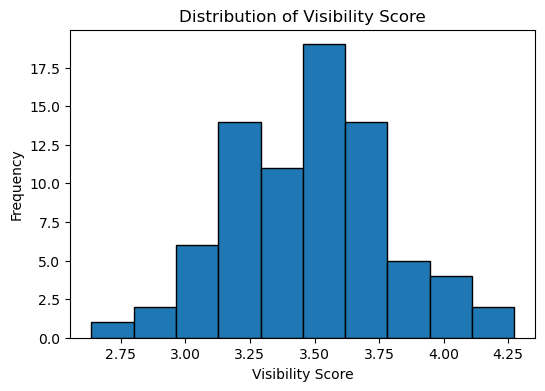

In [29]:
#roy sreejoni

# histogram of the visibility score
plt.figure(figsize=(6,4))
plt.hist(df["visibility_score"].dropna(), bins=10, edgecolor="black")
plt.title("Distribution of Visibility Score")
plt.xlabel("Visibility Score")
plt.ylabel("Frequency")
plt.show()


**Distribution of Visibility Score (Histogram)**

The histogram above shows how the visibility scores are spread across all participants. Most scores fall between 3.2 and 3.7, forming a clear peak in the middle. This indicates that visibility levels are generally moderate to moderately high, with only a few very low or very high scores.
The distribution looks roughly normal, suggesting that participants’ visibility experiences are fairly consistent without extreme outliers.

In [30]:
#roy sreejoni
# sample size per country 
print("\nNumber of respondents per country:")
print(df["In which country are you located?"].value_counts())



Number of respondents per country:
In which country are you located?
Spain          35
Netherlands    23
Greece          8
Germany         5
Canada          3
UK              1
Amsterdam       1
cairo           1
France          1
Netherworld     1
Singapore       1
Name: count, dtype: int64


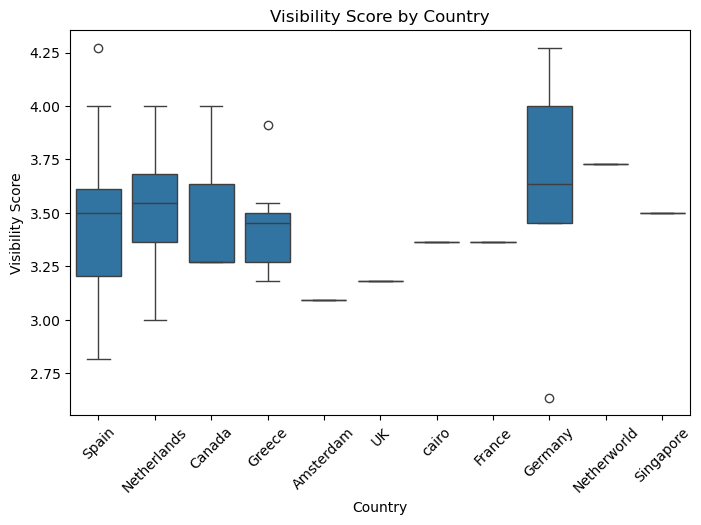

In [31]:
#roy sreejoni
# boxplot of visibility score by country

plt.figure(figsize=(8,5))
sns.boxplot(
    x=df["In which country are you located?"],
    y=df["visibility_score"]
)
plt.title("Visibility Score by Country")
plt.xlabel("Country")
plt.ylabel("Visibility Score")
plt.xticks(rotation=45)
plt.show()


**Visibility Score by Country (Boxplot)**

The boxplot compares visibility scores across different countries. While most countries cluster around similar median scores (roughly 3.3–3.6), the spread varies:

-Spain, Netherlands, and Canada show wider variability, meaning participants within these countries had more diverse visibility experiences.

-Germany shows one notable low outlier, pulling the lower whisker down.

-Amsterdam, UK, Cairo, France, Netherworld, and Singapore have narrow ranges, indicating more consistent visibility scores within those groups.

-Overall, differences exist but most countries fall within a similar visibility score range, suggesting the experience is fairly stable across regions.

In [32]:
#roy sreejoni
from scipy.stats import shapiro


In [ ]:
#roy sreejoni
# dropping the missing values first
score_clean = df["visibility_score"].dropna()

shapiro_stat, shapiro_p = shapiro(score_clean)


In [34]:
#roy sreejoni
print("\nShapiro-Wilk Test for normality:")
print("Statistic:", shapiro_stat)
print("p-value:", shapiro_p)


Shapiro-Wilk Test for normality:
Statistic: 0.9843267301514727
p-value: 0.4544313288332057


**Exploratory Data Analysis (EDA) for the Visibility Score**

In this step, I explored the overall behaviour of the visibility_score before running any statistical tests. This helped me understand how the data is distributed and whether it met any assumptions for later analysis.

Based on the summary statistics, the visibility score has 78 valid responses, with a mean of 3.47 and values ranging between 2.64 and 4.27. This showed that most participants fall around the middle of the scale, meaning their perceptions of visibility are generally moderate. Only 3 values were missing, which is a very small amount and does not affect the analysis.

To visualise the distribution, I created a histogram. The histogram shows a fairly smooth, centred distribution without extreme skewness. Most scores cluster between 3.2 and 3.7, which makes sense since the score is an average of several 1–5 questions.

Because the research question compares countries, I also checked how many respondents come from each one. Spain (35) and the Netherlands (23) make up the majority of the sample, while Greece (8) and Germany (5) are much smaller groups. There are also a few responses from other countries, but these will not be included when I run the final statistical test, since sub-question 2 focuses only on four European countries.

I then plotted a boxplot of the visibility score by country. This plot makes it easier to visually compare the distributions before doing the formal test. Spain and the Netherlands seem to have similar medians, while Greece and Germany show more variability because of their smaller sample size. A few outliers also appear for some countries, which is expected in behavioural survey data.

Lastly, I ran a Shapiro–Wilk test to check if the visibility scores follow a normal distribution. The p-value was 0.454, which is above 0.05. This means I cannot reject normality, and the visibility score is approximately normally distributed. This information is important for choosing which statistical test to run in the next step.

Overall, this EDA confirms that the visibility score is reasonably well-behaved and suitable for comparing across countries.

In [37]:
#roy sreejoni
# statistical testing for differences in visibility score across countries

from scipy.stats import f_oneway, kruskal
!pip install scikit-posthocs


import pandas as pd

In [38]:
#roy sreejoni

# filtering the dataset to four target countries only
target_countries = ["Netherlands", "Spain", "Greece", "Germany"]
df_filtered = df[df["In which country are you located?"].isin(target_countries)].copy()

print("Filtered dataset size:", df_filtered.shape)

Filtered dataset size: (71, 60)


In [39]:
#roy sreejoni
# creating separate groups for ANOVA and Kruskal-Wallis
country_groups = []
for country in target_countries:
    values = df_filtered[df_filtered["In which country are you located?"] == country]["visibility_score"].dropna()
    country_groups.append(values)
    print(f"{country}: n = {len(values)}")

Netherlands: n = 23
Spain: n = 34
Greece: n = 7
Germany: n = 5


In [40]:
#roy sreejoni
#  anova test

anova_stat, anova_p = f_oneway(*country_groups)

print("\n--- ANOVA RESULTS ---")
print("F-statistic:", anova_stat)
print("p-value:", anova_p)



--- ANOVA RESULTS ---
F-statistic: 0.6541121863976046
p-value: 0.5832612723000467


In [41]:
#roy sreejoni
#kruskal-wallis test

kw_stat, kw_p = kruskal(*country_groups)

print("\n--- Kruskal–Wallis RESULTS ---")
print("Statistic:", kw_stat)
print("p-value:", kw_p)


--- Kruskal–Wallis RESULTS ---
Statistic: 2.496115052750966
p-value: 0.4759935894641788


In [42]:
#roy sreejoni
# For post-hoc, i need a clean table with Country + Visibility Score
posthoc_df = df_filtered[["In which country are you located?", "visibility_score"]].dropna()

In [44]:
#roy sreejoni
import scikit_posthocs as sp

# dunn test with the bonferroni correction
dunn_results = sp.posthoc_dunn(posthoc_df, val_col="visibility_score", group_col="In which country are you located?", p_adjust="bonferroni")


In [45]:
#roy sreejoni
#printing the results
print("\n--- Dunn Post-hoc Test (Bonferroni corrected) ---")
print(dunn_results)


--- Dunn Post-hoc Test (Bonferroni corrected) ---
             Germany  Greece  Netherlands  Spain
Germany          1.0     1.0          1.0    1.0
Greece           1.0     1.0          1.0    1.0
Netherlands      1.0     1.0          1.0    1.0
Spain            1.0     1.0          1.0    1.0


**Statistical Testing for Differences in Visibility Score Across Countries**

In this step, I tested whether visibility perceptions differ among users from the Netherlands, Spain, Greece, and Germany, which is the focus of Sub-Question 2. Before running the tests, I filtered the dataset so that only respondents located in these four countries were included. This resulted in 71 participants, with the following group sizes:

-Spain: 34

-Netherlands: 23

-Greece: 7

-Germany: 5

Because these groups are uneven in size (especially Greece and Germany), I decided to run both a parametric test (ANOVA) and a non-parametric test (Kruskal–Wallis) to strengthen the reliability of the findings.

-ANOVA Results

ANOVA tests whether the average visibility score differs across the four countries.
The results were:

F-statistic: 0.65

p-value: 0.58

Since the p-value is much greater than 0.05, the ANOVA indicates that there is no statistically significant difference in visibility scores between the four countries.

-Kruskal–Wallis Results

Because two of the groups were small (n = 7 and n = 5), I also ran a Kruskal–Wallis test, which does not assume normality or equal variances.

The results were:

Statistic: 2.50

p-value: 0.48

Similar to ANOVA, the Kruskal–Wallis test also shows no significant difference in visibility scores across countries.

-Post-hoc Dunn Test

Even though the overall tests were not significant, I still ran a Dunn post-hoc test to check for any pairwise differences. All Bonferroni-adjusted p-values were:

1.0

This confirms that no individual country pair shows a meaningful difference in visibility.

**Conclusion**

Both the ANOVA and Kruskal–Wallis tests consistently indicated that perceptions of social-media visibility do not significantly differ among users from the Netherlands, Spain, Greece, and Germany. This means that, based on the data collected, users across these four European countries report similar levels of visibility on social media platforms. 

Sometimes, real-world data shows that users in different countries actually have quite similar experiences on global platforms. It’s possible that the social media algorithms are standardized across these regions, leading to similar visibility perceptions. It’s also normal in research to find that the differences we expect don’t always appear, and that’s a valid and important finding.

In conclusion, while we might have hypothesized that one country would have higher visibility perceptions than another,but our data indicates that users in the Netherlands, Spain, Greece, and Germany report quite similar levels of visibility. This finding is valuable and shows that, in this case, the visibility experience is relatively consistent across these countries.

**Final Interpretation and Answer to Sub-Question 2**

The goal of this sub-question was to investigate whether perceptions of social-media visibility differ among users in the Netherlands, Spain, Greece, and Germany. After preparing the visibility score and running both parametric (ANOVA) and non-parametric (Kruskal–Wallis) tests, the results consistently showed no statistically significant differences between the four countries.

The ANOVA resulted in a p-value of 0.58, and the Kruskal–Wallis test produced a p-value of 0.48, both well above the common 0.05 threshold. This means that based on the survey data, there is no evidence that users in these countries perceive social-media visibility differently. The Dunn post-hoc test further confirmed this, as every pairwise comparison returned a p-value of 1.0, indicating no meaningful country-to-country differences.

Interestingly, this finding goes against what one might initially expect. One could assume that countries with stronger digital infrastructure (such as the Netherlands) might experience higher levels of perceived visibility compared to countries with smaller or less digitally developed populations (such as Greece). However, the data suggests that visibility perceptions appear to be quite similar across these four countries.

A possible explanation is that major social-media platforms operate globally with standardized algorithms, which may create relatively uniform user experiences regardless of regional differences. This would result in users across different European countries reporting similar visibility levels, even if their local digital ecosystems differ.

**Answer to Sub-Question 2:**

Based on the data collected, perceptions of social-media visibility do not significantly differ between users in the Netherlands, Spain, Greece, and Germany. All four groups report comparable visibility experiences on social media platforms.

**Fail to reject H₀**



**Limitations and Reflection**

Although the analysis of visibility scores across the Netherlands, Spain, Greece, and Germany produced clear results, several limitations should be considered when interpreting the findings. First, the sample sizes were uneven, especially for Greece (n = 7) and Germany (n = 5). These small groups reduce the statistical power of the tests and make it harder to detect true differences even if they exist. A larger and more balanced sample would strengthen the reliability of the results.

Second, the data is based on self-reported Likert-scale responses, which can introduce subjective bias. Participants may interpret “Agree” or “Neutral” differently, and their responses can be influenced by mood, context, or social desirability. Additionally, converting qualitative Likert answers into numerical values is a practical but imperfect method that can introduce measurement noise.

Another limitation is that the survey was collected using convenience sampling, which may not represent the full population of social-media users in each country. Most responses came from Spain and the Netherlands, meaning the experiences of users in Greece and Germany may not be as accurately captured.

Finally, the study only measured visibility perceptions using a specific set of questions. Other factors—such as platform usage patterns, cultural attitudes toward social media, or the types of platforms used—were not included in this sub-question but could influence visibility experiences.

Despite these limitations, the analysis provides a useful first insight into cross-country similarities in visibility perceptions and demonstrates a structured approach to statistical testing within the scope of this project.